# Исследование данных о продажах компьютерных игр за 2016 год

В данной работе будут изучаться исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные предоставлены по 2016 год. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**:
1. Определение закономерностей, определяющих успешность игры. 
2. Определение потенциально популярного продукта в целях запуска рекламных кампаний.

**Ход исследования**

Данные были получены `https://code.s3.yandex.net/datasets/games.csv`. 

**Информация о входных данных**
* __``Name``__ — название игры
* __``Platform``__ — платформа
* __``Year_of_Release``__ — год выпуска
* __``Genre``__ — жанр игры
* __``NA_sales``__ — продажи в Северной Америке (миллионы долларов)
* __``EU_sales``__ — продажи в Европе (миллионы долларов)
* __``JP_sales``__ — продажи в Японии (миллионы долларов)
* __``Other_sales``__ — продажи в других странах (миллионы долларов)
* __``Critic_Score``__ — оценка критиков (максимум 100)
* __``User_Score``__ — оценка пользователей (максимум 10)
* __``Rating``__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.

### 1. Общая информация о датасете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.2)
sns.set_palette(sns.color_palette('Paired'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('data/project_4/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6866,Ratchet & Clank: Going Commando (JP weekly sales),PS2,2003.0,Action,0.00,0.00,0.24,0.00,NaN,NaN,NaN
13424,The Berenstain Bears and the Spooky Old Tree,GBA,2005.0,Platform,0.03,0.01,0.00,0.00,NaN,NaN,NaN
9989,Darkspore,PC,2011.0,Role-Playing,0.07,0.03,0.00,0.01,65.0,6,T
13625,Kids Learn Music A+ Edition,DS,2011.0,Misc,0.04,0.00,0.00,0.00,NaN,NaN,NaN
7048,Mega Man Battle Network 5: Team Colonel / Prot...,GBA,2004.0,Role-Playing,0.16,0.06,0.00,0.00,NaN,NaN,NaN
1257,NFL Blitz,PS,1998.0,Sports,1.41,0.05,0.00,0.04,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
2716,Mega Man X5,PS,2000.0,Platform,0.30,0.21,0.20,0.05,76.0,8.9,E
7534,Valkyria Chronicles,PS4,2016.0,Role-Playing,0.07,0.05,0.05,0.03,NaN,NaN,NaN
15511,Backyard Baseball '09,PS2,2008.0,Sports,0.01,0.01,0.00,0.00,NaN,tbd,E


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


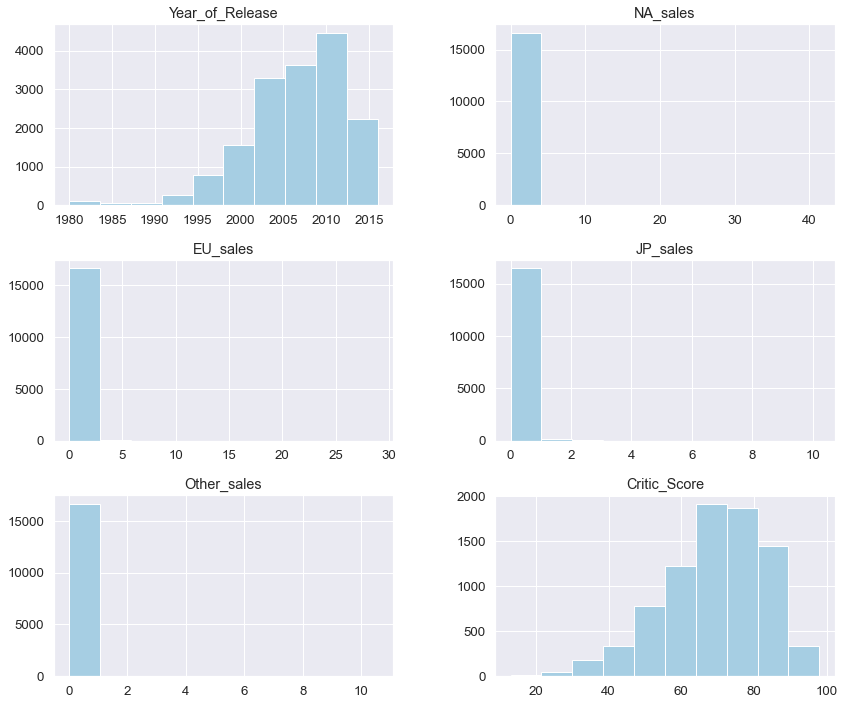

In [7]:
df.hist(figsize=(14, 12));

Проверка на полные дубликаты

In [8]:
df.duplicated().sum()

0

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
    <b>Первоночально получена таблица:</b> <br>  
- Количество столбцов: 11<br> 
- Количество строк: 16715<br> 
- Тип данных в столбцах: float64(6), object(5)<br>
- Полных дублей строк не обнаружено    
<br>
<br>    
    <b>Существующие проблемы:</b><br>  
- Столбцы имеют некорректные названия<br> 
- Столбцы 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating' имеют пропущенные значения<br> 
- Ряд столбцов имеет некорректный тип данных
    
</font>  
</div>    
</div>

### 2.Подготовка данных

#### 2.1 Корректировка названия столбцов (приведение к нижнему регистру)

In [9]:
# Приведем названия столбцов к нормализованному виду
df.columns = df.columns.str.lower()

In [10]:
# Приведем значения в столбцах к нижнему регистру
columns = ['name', 'platform', 'genre', 'rating']

for column in columns:
    df[column] = df[column].str.lower()

In [11]:
# Проверка, появились ли полные дубликаты после приведения к нижнему регистру
df.duplicated().sum()

0

#### 2.2 Преобразование данных в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Скорректирован типа данных в колонке year_of_release, установлен формат Int64. После обработки пустых значений в колонке user_score, тип данных будет изменен на float.
    
</font>  
</div>    
</div>

#### 2.3 Обработка пропусков

Подсчет пропусков в численном выражении

In [13]:
pd.DataFrame(round(df.isna().sum())).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


Подсчет пропусков в процентном выражении

In [14]:
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропуски в колонке 'name'

In [15]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
df = df.dropna(subset = ['name'])

Пропуски в колонке 'year_of_release'

In [17]:
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
# пропущенных значений в колонке 2% от общей массы, поэтому принято решение их удалить
df = df.dropna(subset = ['year_of_release'])

Пропуски в колонках 'critic_score', 'user_score', 'rating'

In [19]:
#df['critic_score'] = df['critic_score'].fillna(99999)
#df['user_score'] = df['user_score'].fillna(99999)
df['rating'] = df['rating'].fillna('TBD')

tbd

In [20]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Приведение оставшихся типов данных

In [21]:
df['user_score'] = df['user_score'].astype('float')

#### 2.4 Количество суммарных продаж во всех регионах (отдельный столбец)

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Были удалены строки с отсутствующим значением 'name' и 'year_of_release', 'rating' изменен на TBD для удобства восприятия, так как столбец имеет тип object. Удаление данной информации могло бы негативно отразиться, так как объем слишком велик. Вероятнее всего, пропуски могли появиться в результате того, что рейтинг и скоринги могли быть не проставлены, так как их еще нет, либо были забыты. 
    
Tbd означает to be decided, то есть не определенное значение, которое планируется определить в будущем.
    
</font>  
</div>    
</div>

### 3. Исследовательский анализ данных

#### 3.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [23]:
game_count = df.groupby('year_of_release')['name'].agg('count').reset_index()

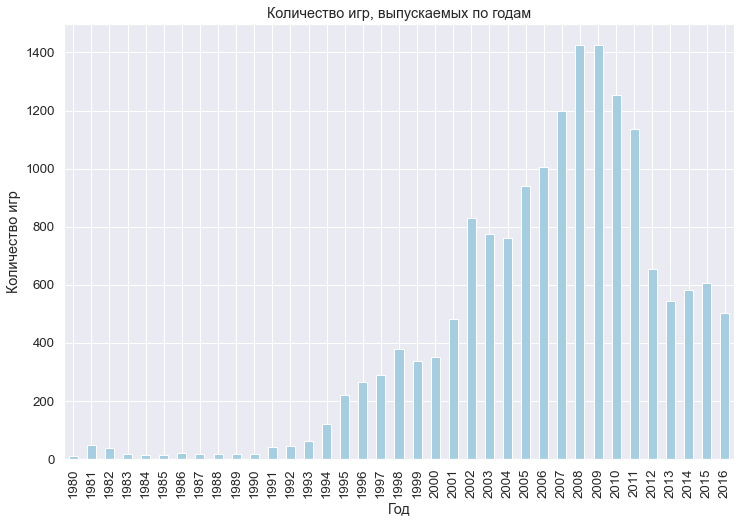

In [24]:
game_count.plot(x='year_of_release', y='name', kind='bar', legend=None)
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.title('Количество игр, выпускаемых по годам');

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Важны все данные, однако, в расчет не брались данные, в которых не было указано года. Так же данные до 1993 года можно считать хвостом, но удалять их не считаю правильным.
</font>  
</div>    
</div>

Уникальные игры, все зависимости от наименования платформы

In [25]:
unique_game_count = df.groupby('name')['year_of_release'].min().reset_index()

In [26]:
unique_game_count = unique_game_count.groupby('year_of_release')['name'].count().reset_index()

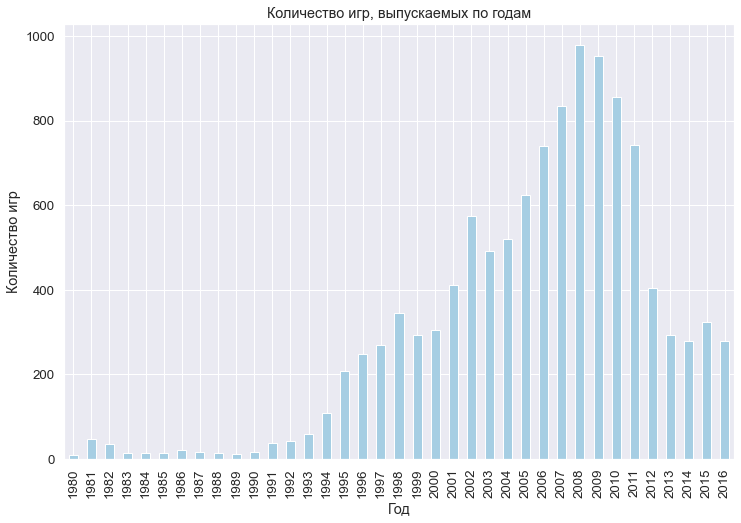

In [27]:
unique_game_count.plot(x='year_of_release', y='name', kind='bar', legend=None)
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.title('Количество игр, выпускаемых по годам');

In [28]:
game_count['unique_%'] = (unique_game_count['name'] / game_count['name']) * 100

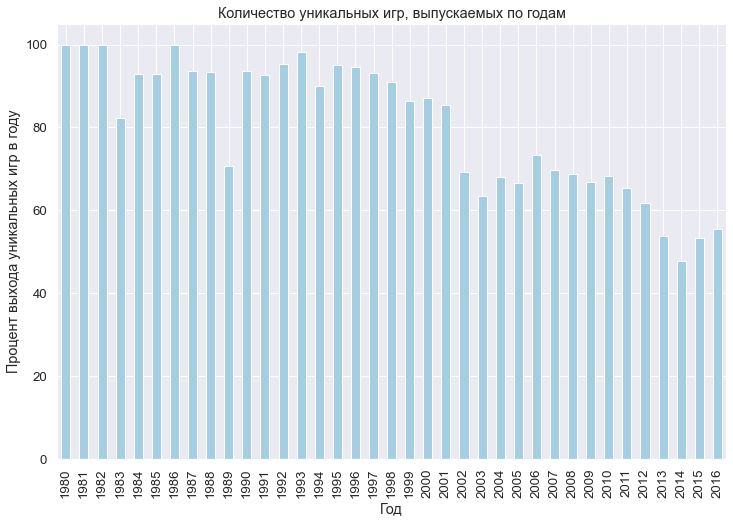

In [29]:
game_count.plot(x='year_of_release', y='unique_%', kind='bar', legend=None)
plt.ylabel('Процент выхода уникальных игр в году')
plt.xlabel('Год')
plt.title('Количество уникальных игр, выпускаемых по годам');

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Судя по графикам, количество уникальных игр постепенно снижается в силу того, что старые игры начинают выходить на новых платформах.
</font>  
</div>    
</div>

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
sales = df.pivot_table(index = 'platform', values ='total_sales', aggfunc='sum' ).sort_values(by='total_sales')

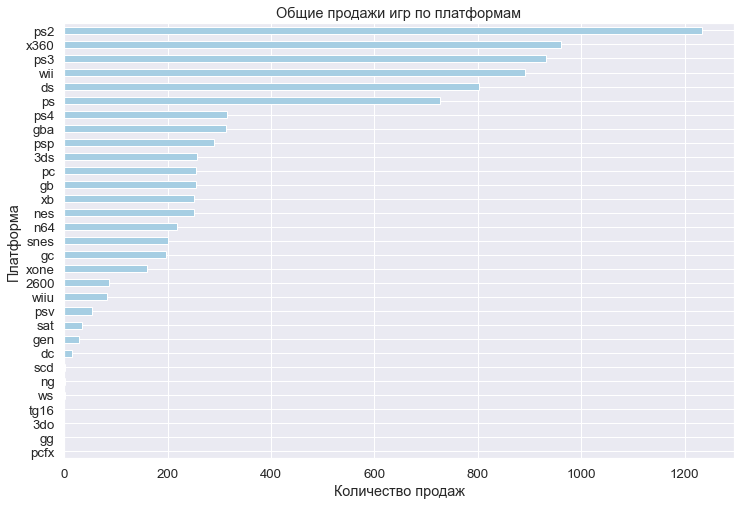

In [31]:
sales.plot(y = 'total_sales', kind='barh', legend=None)
plt.ylabel('Платформа')
plt.xlabel('Количество продаж')
plt.title('Общие продажи игр по платформам');

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
    Наибольшей популярностью пользовались платформы: <b>PS2</b>, <b>X360</b>, <b>PS3</b>, <b>Wii</b>, <b>DS</b> и <b>PS</b>.
</font>  
</div>    
</div>

In [32]:
# возьмем информацию только о самых популярных платформах
top_6 = sales.index[-6:]

In [33]:
top_platforms = df.query('platform in @top_6')

In [34]:
t = top_platforms.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

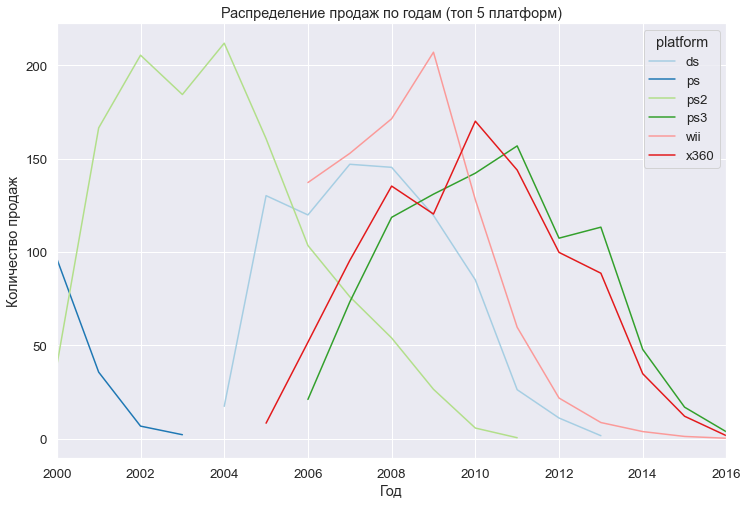

In [35]:
t.plot();
plt.xlim([2000, 2016])
plt.xlabel('Год') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж по годам (топ 5 платформ)');
plt.show()

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
    Исходя из полученных данных, продажи самых популярных платформ растут первые <b>~4</b> года после релиза, далее наблюдается спад продаж и полное замещение новой платформой. Средний жизненный цикл платформы составляет <b>~10</b>  лет.
    
</font>  
</div>    
</div>

#### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [36]:
actual_period = df[(df['year_of_release'] >= 2014)]

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
В связи с тем, что период роста продаж составляет около 4 лет, то для прогноза на 2017 год следует брать предшествующие 3 года. Таким образом была отобрана дата с 2014 года включительно.
</font>  
</div>    
</div>

#### Не учитывайте в работе данные за предыдущие годы.

#### 3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [37]:
top_5 = actual_period.groupby('platform')['total_sales'].agg('sum').sort_values(ascending = False).reset_index().nlargest(5, 'total_sales')

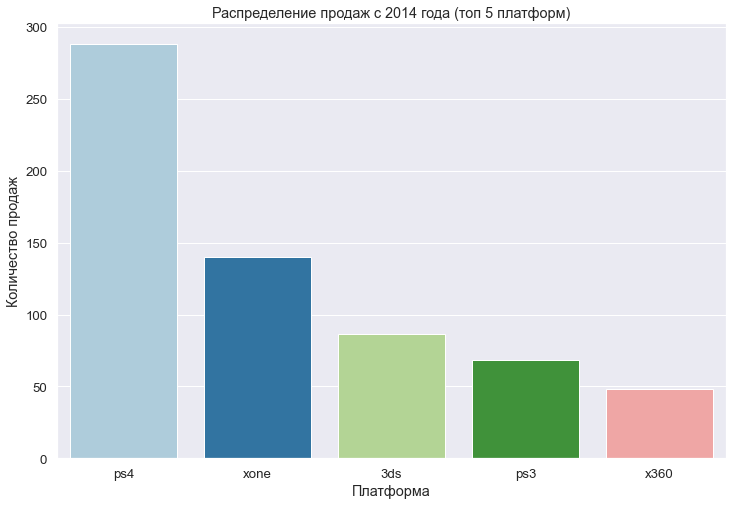

In [38]:
sns.barplot(
    data = top_5,
    x='platform',
    y='total_sales'
)
plt.xlabel('Платформа') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж с 2014 года (топ 5 платформ)');
plt.show()

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
    С 2014 по 2016 год лидерами по продажам являются платформы: <b>PS4</b>, <b>XOne</b>, <b>3DS</b>, <b>PS3</b>, <b>X360</b>.
</font>  
</div>    
</div>

In [39]:
t = actual_period.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

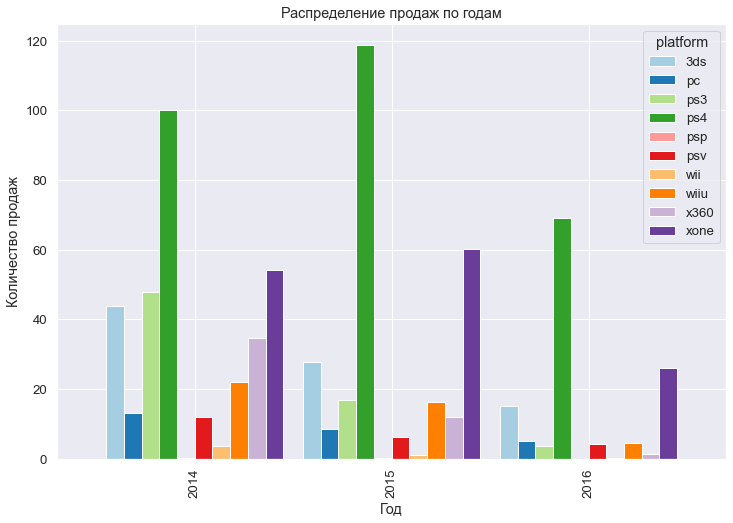

In [40]:
t.plot(kind='bar', width=0.9);
plt.xlabel('Год') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж по годам')
plt.show();

 <div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Исходя из полученных данных, продажи всех выбранных платформ снизились. Потенциально прибыльными платформами можно определить <b>XOne</b> и <b>PS4</b>, так же существует вероятность, что продажи 3ds, PC, PSV и Wiiu хоть и сократятся, но не уйдут полностью.
</font>  
</div>    
</div>

#### 3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

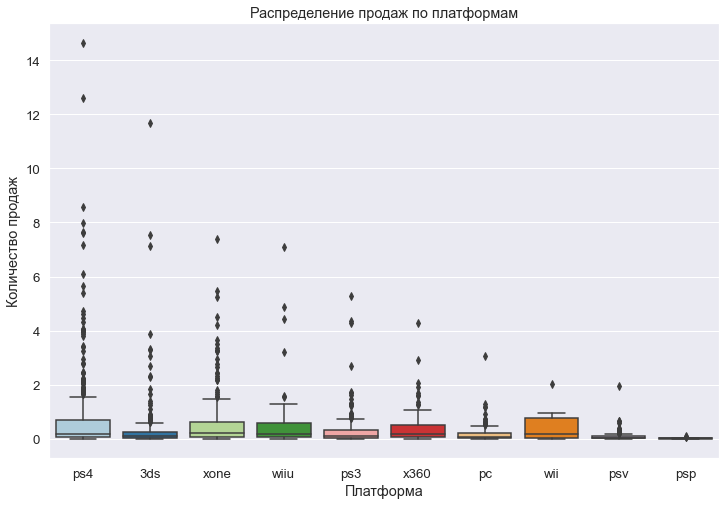

In [41]:
sns.boxplot(
    data=actual_period, x="platform", y="total_sales"
)
plt.xlabel('Платформа') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж по платформам')
plt.show();

Для лучшей наглядности сделаем лимит по оси Y

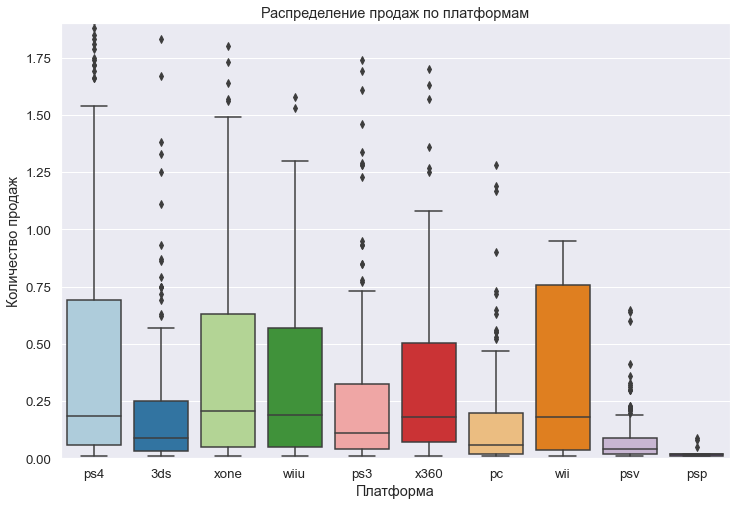

In [42]:
ax = sns.boxplot(
    data=actual_period, x="platform", y="total_sales"
)
ax.set_ylim(0, 1.9)
plt.xlabel('Платформа') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж по платформам')
plt.show();

 <div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
У большинства платформ наблюдаются выбросы, это служит показателем того, что в определенное время были совершены транзакции, в их количественном выражении, существенно превышающее их объемы в среднем.
    
На графике видно, что для таких платформ как PS4, XOne, WiiU, X360 и Wii медиана располагается на уровне около 0.2, для остальных платформ медиана расположена значительно ниже. 3ий квартиль для платформы Wii располагается на уровне 0.76, PS4 - 0.7, XOne - 0.64. Можно сделать вывод, что для платформы PS4 общий объём продаж для каждой игры находится в диапазоне от 0.1 до 0.7, для платформы Wii в диапазоне от 0.08 до 0.76, для XOne суммарный объём продаж для каждой игры входит в диапазон от 0.09 до 0.64.  
Несмотря на то что медианные продажи для PS4, XOne, WiiU, X360 и Wii находятся в одном уровне, потенциально прибыльными можно считать только PS4, XOne, WiiU. А вот X360 и Wiiпоказали себя хорошо за рассматриваемый период, но судя по пунктам ранее уже подошли к завершению своего жизненного цикла.
</font>  
</div>    
</div>

#### 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [43]:
PS4 = actual_period[(actual_period['platform'] == "ps4")]

In [44]:
# функция для подсчета корреляции в соответствии со шкалой Чеддока
def correl(corr):
    if 0.1 <= abs(corr) <= 0.3:
        print('Корреляция слабая')
    elif 0.3 < abs(corr) <= 0.5:
        print('Корреляция умеренная')
    elif 0.5 < abs(corr) <= 0.7:
        print('Корреляция заметная')
    elif 0.7 < abs(corr) <= 0.9:
        print('Корреляция высокая')
    elif 0.9 < abs(corr):
        print('Корреляция весьма высокая')   
    else:
        print('Корреляцию невозможно определить')

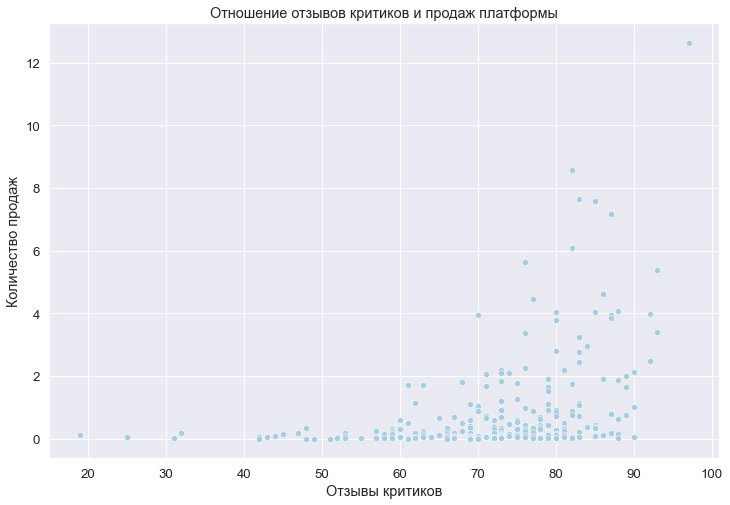

Полученное значение:  0.403
Корреляция умеренная


In [45]:
sns.scatterplot(data=PS4, x='critic_score', y='total_sales')
plt.xlabel('Отзывы критиков') 
plt.ylabel('Количество продаж') 
plt.title('Отношение отзывов критиков и продаж платформы')
plt.show();
print('Полученное значение: ', round(PS4['critic_score'].corr(PS4['total_sales']),3))
correl(PS4['critic_score'].corr(PS4['total_sales']))

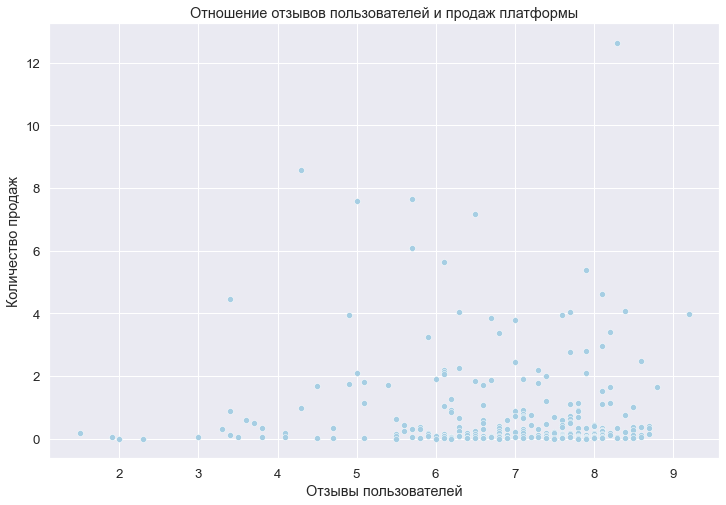

Полученное значение:  -0.04
Корреляцию невозможно определить


In [46]:
sns.scatterplot(data = PS4, x = 'user_score', y = 'total_sales')
plt.xlabel('Отзывы пользователей') 
plt.ylabel('Количество продаж') 
plt.title('Отношение отзывов пользователей и продаж платформы')
plt.show();
print('Полученное значение: ', round(PS4['total_sales'].corr(PS4['user_score']),3))
correl(PS4['total_sales'].corr(PS4['user_score']))

 <div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Количество продаж платформы увеличивается с улучшением рейтинга как критиков, так и пользователей. Однако, корреляция отзывов пользователей и продаж отрицательная, чему с большой вероятностью послужили несколько выбросов. 
</font>  
</div>    
</div>

#### 3.7 Соотнесите выводы с продажами игр на других платформах.

In [47]:
def critic_plotting(data):
    data_to_plot = actual_period[(actual_period['platform'] == data)]
    sns.scatterplot(data = data_to_plot, x='critic_score', y='total_sales')
    plt.xlabel('Отзывы критиков') 
    plt.ylabel('Количество продаж') 
    plt.title('Отношение отзывов критиков и продаж платформы ' + str(data))
    plt.show();
    print('Полученное значение: ', round(data_to_plot['total_sales'].corr(data_to_plot['critic_score']),3))
    correl(data_to_plot['total_sales'].corr(data_to_plot['critic_score']))

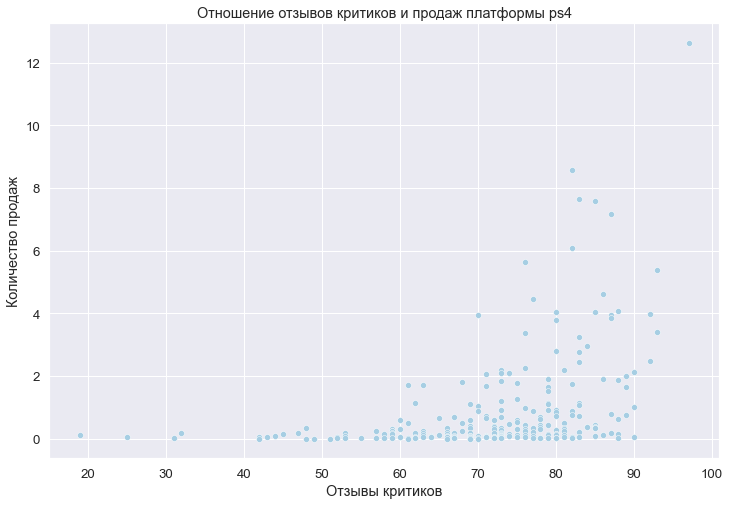

Полученное значение:  0.403
Корреляция умеренная


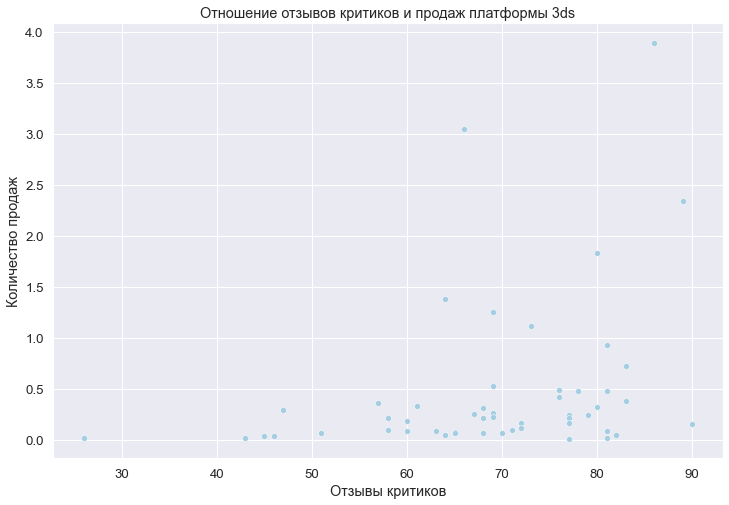

Полученное значение:  0.314
Корреляция умеренная


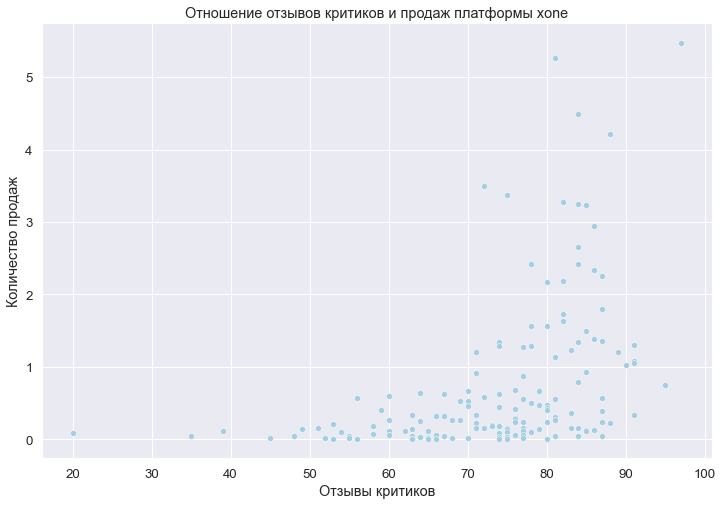

Полученное значение:  0.429
Корреляция умеренная


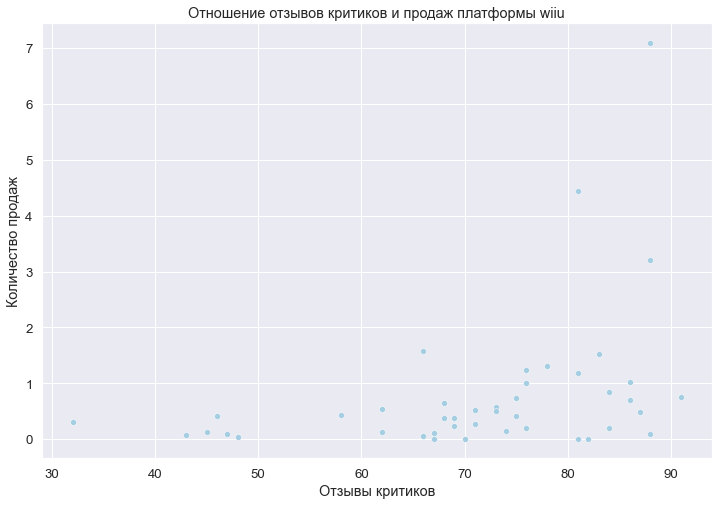

Полученное значение:  0.37
Корреляция умеренная


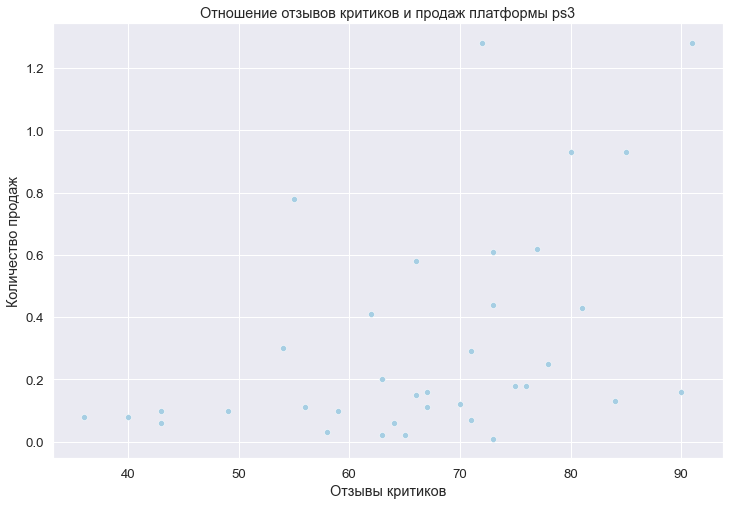

Полученное значение:  0.447
Корреляция умеренная


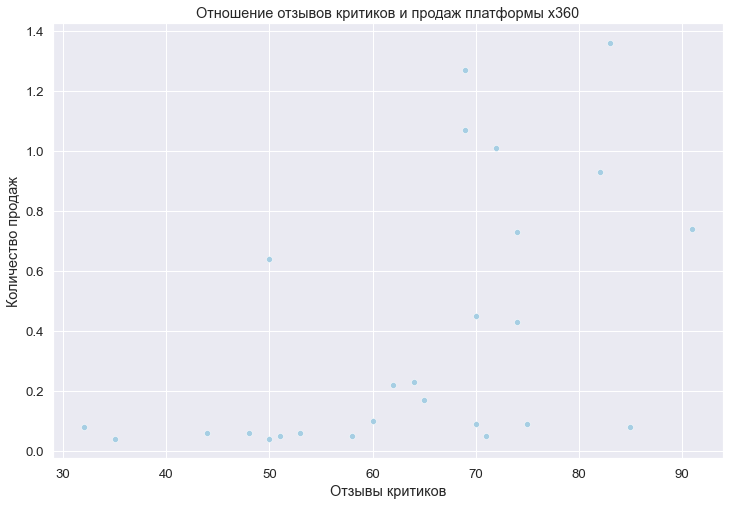

Полученное значение:  0.526
Корреляция заметная


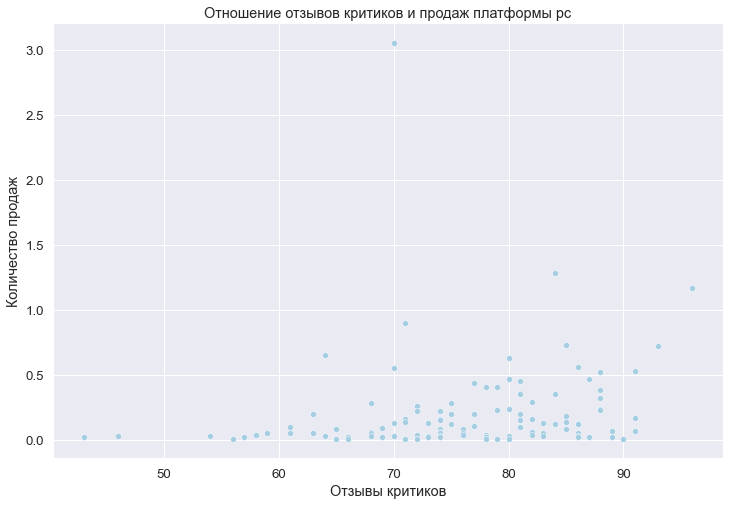

Полученное значение:  0.175
Корреляция слабая


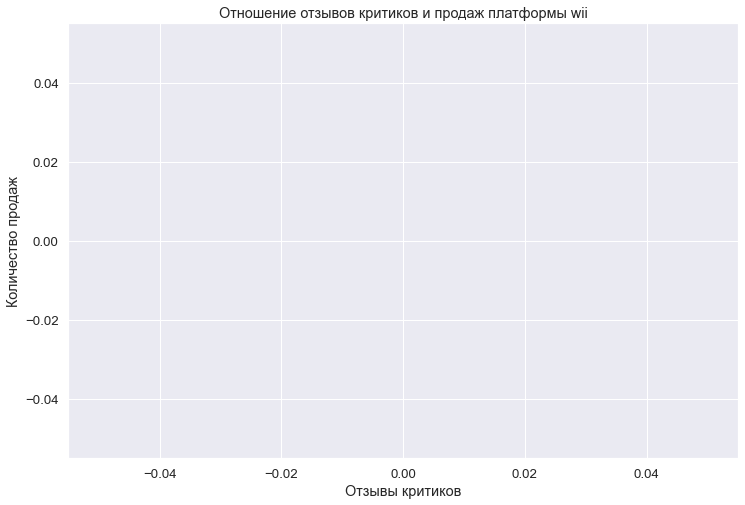

Полученное значение:  nan
Корреляцию невозможно определить


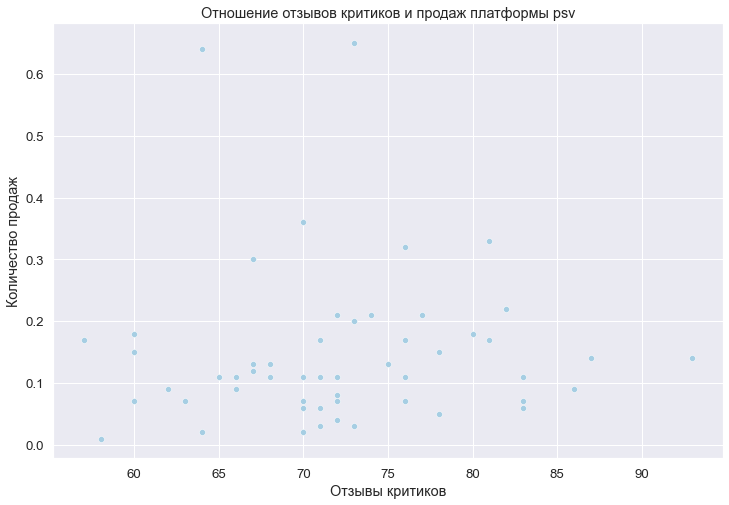

Полученное значение:  0.043
Корреляцию невозможно определить


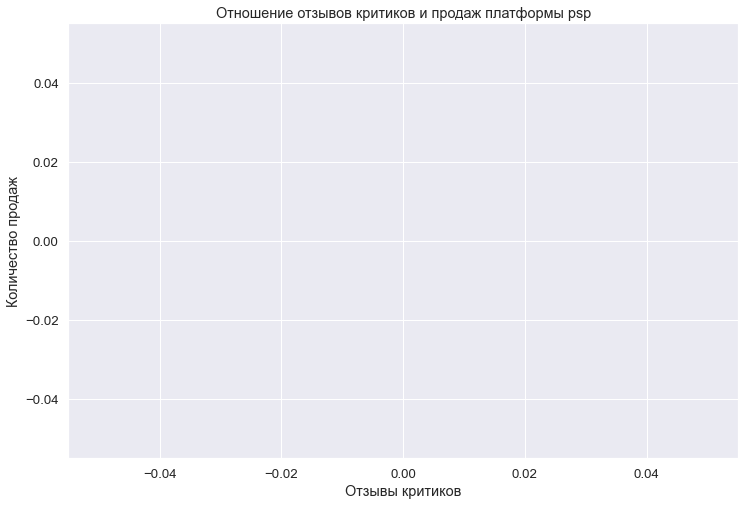

Полученное значение:  nan
Корреляцию невозможно определить


In [48]:
for platform in actual_period['platform'].unique():
    critic_plotting(platform)

 <div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Для ряда платформ недостаточно информации, чтобы построить график. Для XOne четко прослеживается корреляция между отзывами и количеством продаж, хотя корреляция низкая.
</font>  
</div>    
</div>

In [49]:
def user_plotting(data):
    data_to_plot = actual_period[(actual_period['platform'] == data)]
    sns.scatterplot(data=data_to_plot, x='user_score', y='total_sales')
    plt.xlabel('Отзывы пользователей') 
    plt.ylabel('Количество продаж') 
    plt.title('Отношение отзывов пользователей и продаж платформы ' + str(data))
    plt.show()
    print('Полученное значение: ', round(data_to_plot['total_sales'].corr(data_to_plot['user_score']),3))
    correl(data_to_plot['total_sales'].corr(data_to_plot['user_score']))

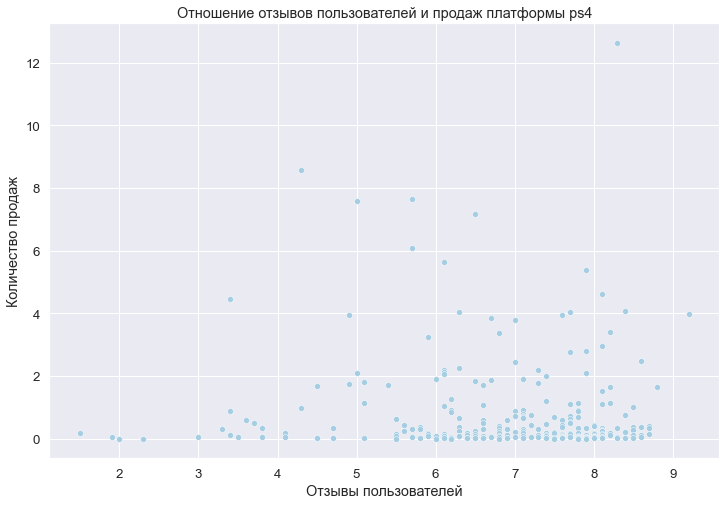

Полученное значение:  -0.04
Корреляцию невозможно определить


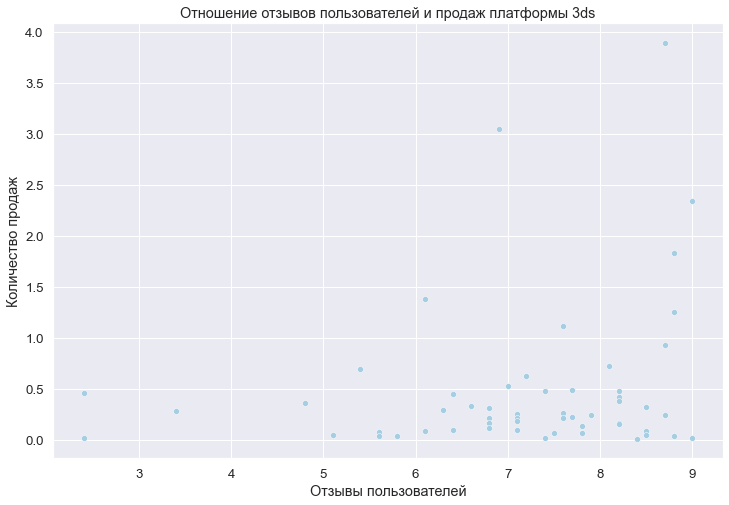

Полученное значение:  0.215
Корреляция слабая


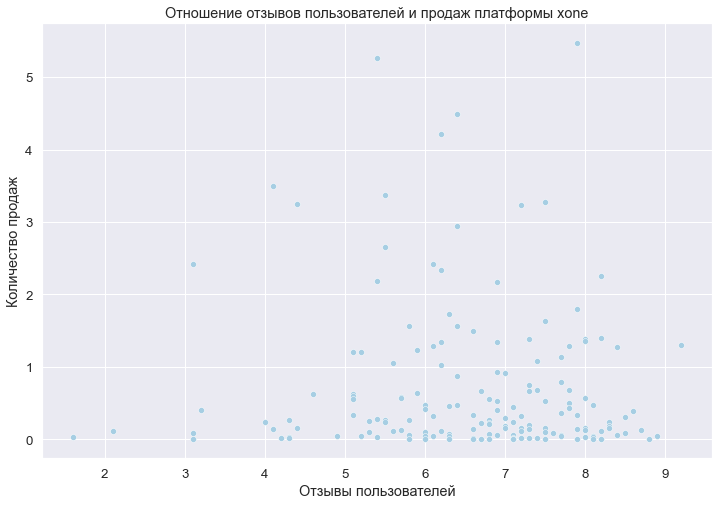

Полученное значение:  -0.07
Корреляцию невозможно определить


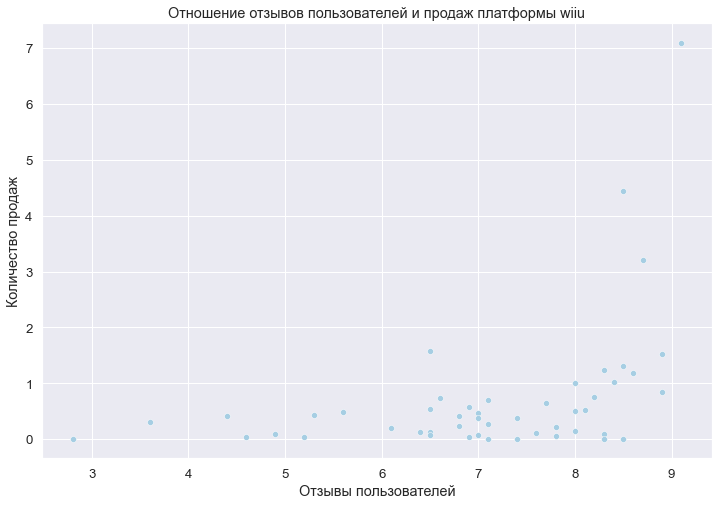

Полученное значение:  0.408
Корреляция умеренная


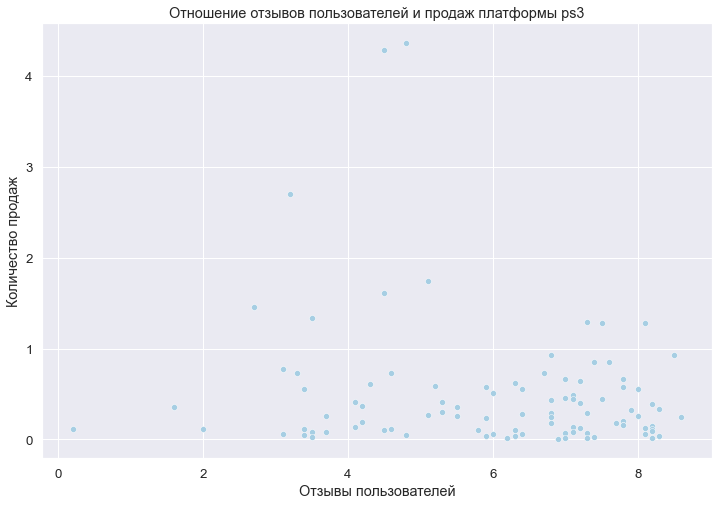

Полученное значение:  -0.167
Корреляция слабая


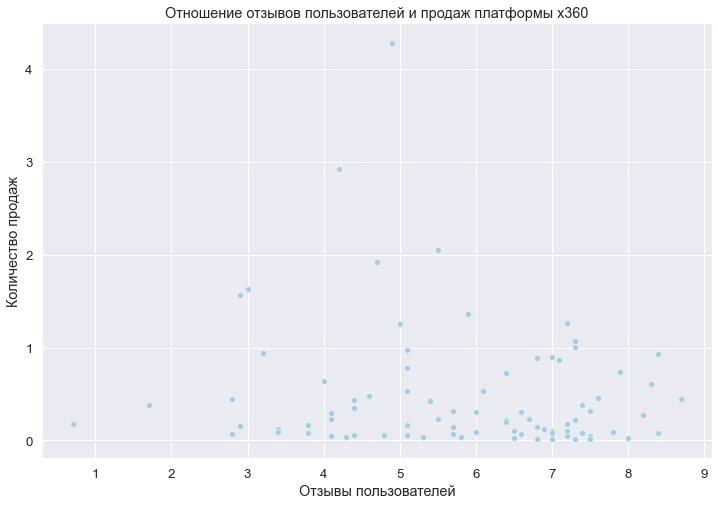

Полученное значение:  -0.138
Корреляция слабая


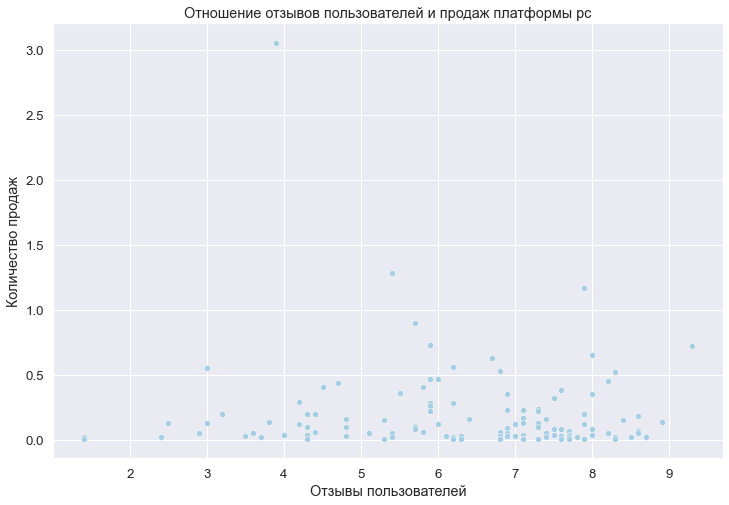

Полученное значение:  -0.072
Корреляцию невозможно определить


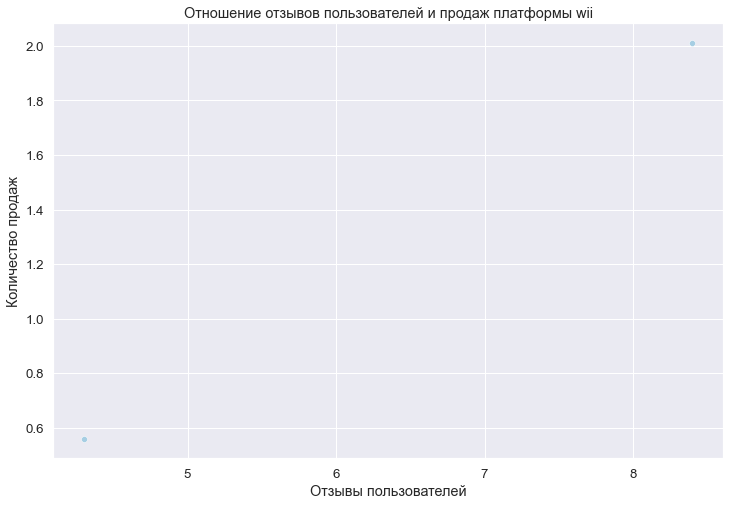

Полученное значение:  1.0
Корреляция весьма высокая


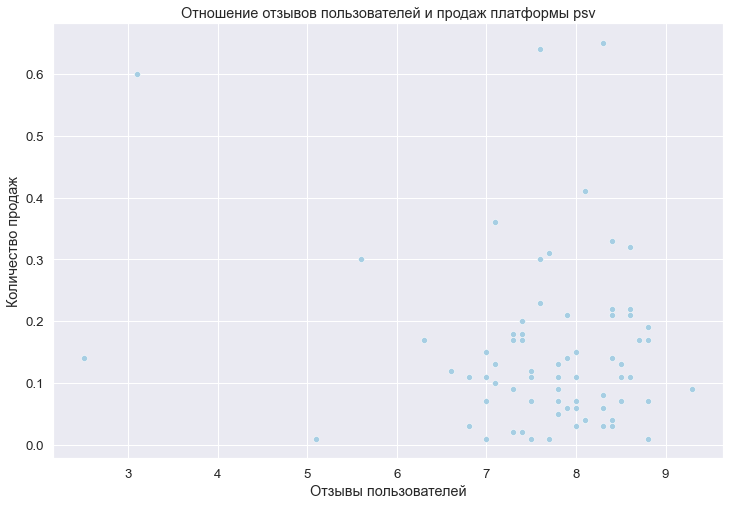

Полученное значение:  -0.168
Корреляция слабая


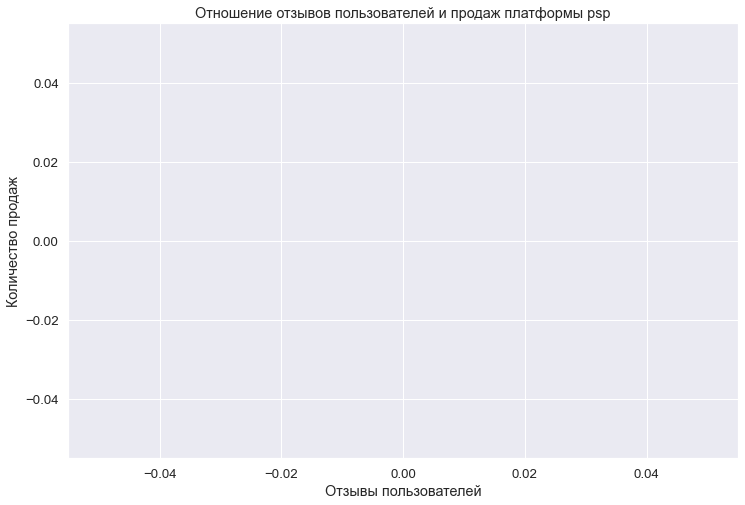

Полученное значение:  nan
Корреляцию невозможно определить


In [50]:
for platform in actual_period['platform'].unique():
    user_plotting(platform)

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Для ряда платформ недостаточно информации, чтобы построить график. В остальных случаях корреляции между рейтингом пользователей и объемами продаж не выявлено.
</font>  
</div>    
</div>

#### 3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [51]:
genres = actual_period.groupby('genre')['total_sales'].agg('median').reset_index().sort_values(by='total_sales', ascending = False )

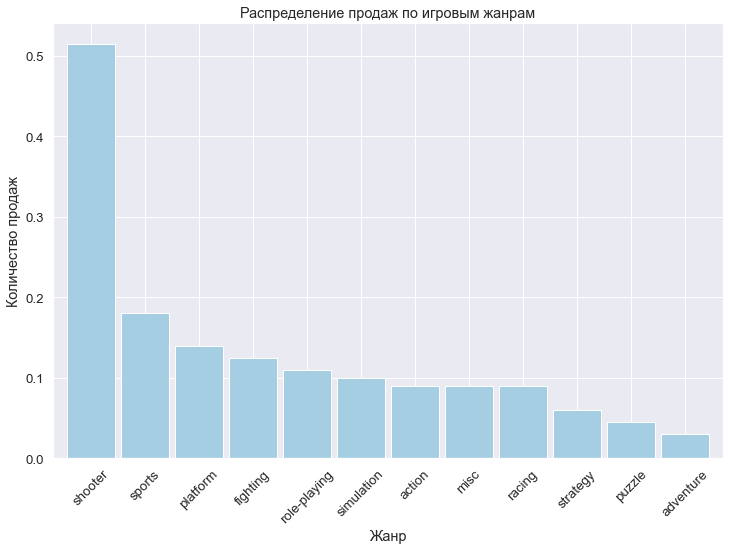

In [52]:
genres.plot(x='genre', y='total_sales', kind='bar', width=0.9, legend = False);
plt.xlabel('Жанр') 
plt.ylabel('Количество продаж') 
plt.title('Распределение продаж по игровым жанрам')
plt.xticks(rotation=45);
plt.show();

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Самыми популярными жанрами являются: <b>shooter</b>, <b>sports</b>, <b>platform</b> и <b>fighting</b>; самыми непопулярными: <b>puzzle</b> и <b>adventure</b>. Самым прибыльным жанром является shooter. Можно сдулать вывод, что самыми прибыльными жанрами являются активные игры, сопряженные с высоким уровнем риска, вызывающие максимальный уровень эмоций.
</font>  
</div>    
</div>

### 4. Портрет пользователя каждого региона

#### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [53]:
platforms = actual_period.groupby('platform')['na_sales', 'eu_sales', 'jp_sales' ].agg('sum').reset_index()

In [54]:
na_sales = platforms[['platform', 'na_sales']].sort_values(by='na_sales', ascending=False).nlargest(5, 'na_sales')
eu_sales = platforms[['platform', 'eu_sales']].sort_values(by='eu_sales', ascending=False).nlargest(5, 'eu_sales')
jp_sales = platforms[['platform', 'jp_sales']].sort_values(by='jp_sales', ascending=False).nlargest(5, 'jp_sales')

In [55]:
# функция для последующей визуализации даты
def plotter(data, column1, column2, ax1):
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    x = sns.barplot(data=data, x=column1, y=column2, ax=axes[ax1]).set(title=title_dict[column2], ylabel='total sales')
    return x

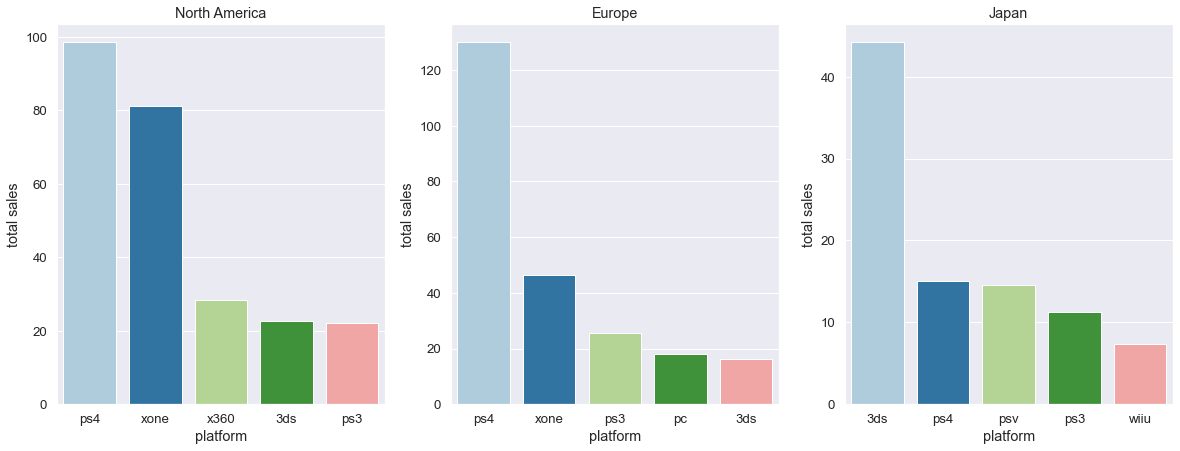

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plotter(na_sales, 'platform', 'na_sales', 0)
plotter(eu_sales, 'platform', 'eu_sales', 1)
plotter(jp_sales, 'platform', 'jp_sales', 2);

In [57]:
# Соотношение продаж платформы к сумме продаж в регионе
na_sales['na_sales_total_ratio'] = round(na_sales['na_sales'] / actual_period['na_sales'].sum(), 2)
eu_sales['eu_sales_total_ratio'] = round(eu_sales['eu_sales'] / actual_period['eu_sales'].sum(), 2)
jp_sales['jp_sales_total_ratio'] = round(jp_sales['jp_sales'] / actual_period['jp_sales'].sum(), 2)

In [58]:
na_sales

,platform,na_sales,na_sales_total_ratio
3,ps4,98.61,0.35
9,xone,81.27,0.29
8,x360,28.30,0.10
0,3ds,22.64,0.08
2,ps3,22.05,0.08


In [59]:
eu_sales

,platform,eu_sales,eu_sales_total_ratio
3,ps4,130.04,0.48
9,xone,46.25,0.17
2,ps3,25.54,0.09
1,pc,17.97,0.07
0,3ds,16.12,0.06


In [60]:
jp_sales

,platform,jp_sales,jp_sales_total_ratio
0,3ds,44.24,0.48
3,ps4,15.02,0.16
5,psv,14.54,0.16
2,ps3,11.22,0.12
7,wiiu,7.31,0.08


<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
В Северной Америке с 2014 по 2016 год доля продаж PS4 составила <b>35 %</b>, XOne - <b>29 %</b> от продаж всех платформ в данном регионе.
<br>    
В Европе с 2014 по 2016 год доля продаж PS4 составила <b>48 %</b>, XOne - <b>17 %</b> от продаж всех платформ в данном регионе.
<br>   
В Японии с 2014 по 2016 год доля продаж 3DS составила <b>48 %</b>, PS4 - <b>16 %</b>, PSV - <b>16%</b> от продаж всех платформ в данном регионе.
</font>  
</div>    
</div>

#### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

In [61]:
genres = actual_period.groupby(['genre'])['na_sales', 'eu_sales', 'jp_sales'].agg('sum').reset_index()

In [62]:
na_genres = genres[['genre', 'na_sales']].sort_values(by='na_sales', ascending=False).nlargest(5, 'na_sales')
eu_genres = genres[['genre', 'eu_sales']].sort_values(by='eu_sales', ascending=False).nlargest(5, 'eu_sales')
jp_genres = genres[['genre', 'jp_sales']].sort_values(by='jp_sales', ascending=False).nlargest(5, 'jp_sales')

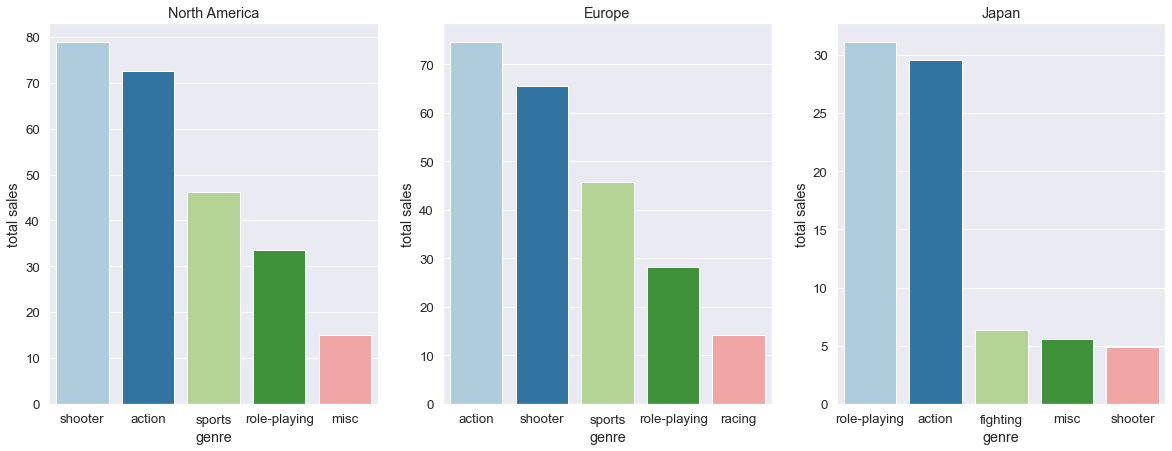

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plotter(na_genres, 'genre', 'na_sales', 0)
plotter(eu_genres, 'genre', 'eu_sales', 1)
plotter(jp_genres, 'genre', 'jp_sales', 2);

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
В Северной Америке с 2014 по 2016 год самыми популярными жанрами стали <b>Shooter</b>, <b>Action</b> и <b>Sports</b>.
<br>    
В Европе с 2014 по 2016 год самыми популярными жанрами стали <b>Action</b>, <b>Shooter</b> и <b>Sports</b>.
<br>   
В Японии с 2014 по 2016 год самыми популярными жанрами стали <b>Role-Playing</b>, <b>Action</b> и <b>Fighting</b>.
</font>  
</div>    
</div>

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [64]:
ratings = actual_period.groupby(['rating'])['na_sales', 'eu_sales', 'jp_sales'].agg('sum').reset_index()

In [65]:
na_ratings = ratings[['rating', 'na_sales']].sort_values(by='na_sales', ascending=False).nlargest(5, 'na_sales')
eu_ratings = ratings[['rating', 'eu_sales']].sort_values(by='eu_sales', ascending=False).nlargest(5, 'eu_sales')
jp_ratings = ratings[['rating', 'jp_sales']].sort_values(by='jp_sales', ascending=False).nlargest(5, 'jp_sales')

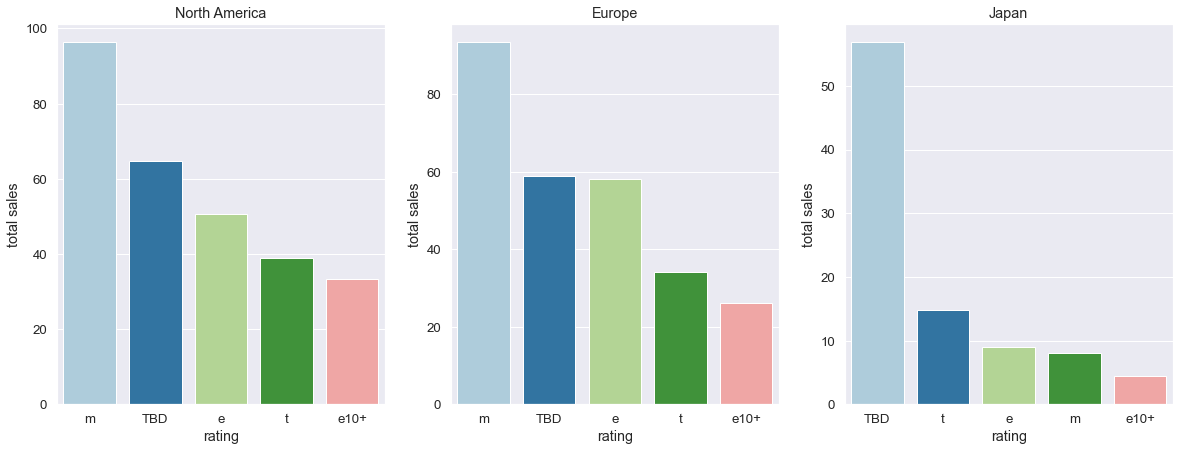

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plotter(na_ratings, 'rating', 'na_sales', 0)
plotter(eu_ratings, 'rating', 'eu_sales', 1)
plotter(jp_ratings, 'rating', 'jp_sales', 2);

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
    <b>Расшифровка значений:</b>
'E': 'Для всех', 'E10+': 'От 10 лет и старше', 'T': 'Подросткам', 'M': 'Для взрослых', 'TBD': 'Рейтинг не определен'
<br>
<br>  
В США и Европе большинство игр имеют маркировку для взрослых или для всех, так же большое место занимают игры без указания маркировки. В Японии подавляющее большинство игр не имеют рейтинга от организации ESRB.
</font>  
</div>    
</div>

### 5. Проверка гипотез

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки данной гипотезы, требуется использовать метод проверки гипотез о равенстве средних двух генеральных совокупностей.

* H[0]: 
    Средние пользовательские рейтинги платформы <b>Xbox One</b> равны средним пользовательским рейтингам платформы <b>PC</b>
* H[1]: 
    Средние пользовательские рейтинги платформы <b>Xbox One</b> не равны средним пользовательским рейтингам платформы <b>PC</b>

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использован метод: scipy.stats.ttest_ind()

In [67]:
xone_user_score = actual_period.query('platform == "xone" and user_score.isna() == False')['user_score'].tolist()

In [68]:
pc_user_score = actual_period.query('platform == "pc" and user_score.isna() == False')['user_score'].tolist()

In [69]:
from scipy import stats as st
import numpy as np

alpha = .05 # критический уровень статистической значимости 5%
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_user_score, 
    pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей, нулевая гипотеза не была отвергнута, это значит, что средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> являются одинаковыми.
</font>  
</div>    
</div>

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки данной гипотезы, требуется использовать метод проверки гипотез о равенстве средних двух генеральных совокупностей.

* H[0]: 
    Средние пользовательские рейтинги жанра <b>Action</b> равны средним пользовательским рейтингам жанра <b> Sports</b>
* H[1]: 
    Средние пользовательские рейтинги жанра <b>Action</b> не равны средним пользовательским рейтингам жанра <b>Sports</b>

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использован метод: scipy.stats.ttest_ind()

In [70]:
action_genre_score = actual_period.query('genre == "action" and user_score.isna() == False')['user_score'].tolist()

In [71]:
sports_genre_score = actual_period.query('genre == "sports" and user_score.isna() == False')['user_score'].tolist()

In [72]:
alpha = .05 # критический уровень статистической значимости 5%
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_genre_score, 
    sports_genre_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
Проверив нулевую гипотезу о равенстве средних двух генеральных совокупностей, нулевая гипотеза была отвергнута, это значит, что средние пользовательские рейтинги жанра <b>Action</b> и <b>Sports</b> не являются одинаковыми.
</font>  
</div>    
</div>

### 6. Общий вывод

<div style="border:solid lightgreen 2px; padding: 20px">
<div class="alert alert-block alert-info">
<font color='Black'>
В ходе данной работы был проведён исследовательский анализ данных о продажах игр, оценках пользователей и экспертов, а так же анализ игровых жанров и платформ. Были составлены портреты пользователей для Северной Америки, Европы и Японии.

По результатам проведенного исследования были проверены следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза не отвергнута.
- Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза отвергнута.    
    
**Получены следующие результаты:** 

- Количество уникальных игр постепенно снижается в силу того, что игры начинают выходить на новых платформах.    
- Наибольшей популярностью пользовались платформы: PS2, X360, PS3, Wii, DS и PS.  
- Исходя из полученных данных, продажи самых популярных платформ растут первые ~4 года после релиза, далее наблюдается спад продаж и полное замещение новой платформой. Средний жизненный цикл платформы составляет ~ 10 лет.
- С 2014 по 2016 год лидерами по продажам являются платформы: PS4, XOne, 3DS, PS3 и X360. Исходя из полученных данных, продажи всех платформ снизились. Потенциально прибыльными платформами можно определить XOne и PS4, так же существует вероятность, что продажи 3ds, PC, PSV и Wiiu хоть и сократятся, но не уйдут полностью. 
- У большинства платформ наблюдаются выбросы, это служит показателем того, что в определенное время были совершены транзакции, в их количественном выражении, существенно превышающее их объемы в среднем.
На графике видно, что для таких платформ как PS4, XOne, WiiU, X360 и Wii медиана располагается на уровне около 0.2, для остальных платформ медиана расположена значительно ниже. 3ий квартиль для платформы Wii располагается на уровне 0.76, PS4 - 0.7, XOne - 0.64. Можно сделать вывод, что для платформы PS4 общий объём продаж для каждой игры находится в диапазоне от 0.1 до 0.7, для платформы Wii в диапазоне от 0.08 до 0.76, для XOne суммарный объём продаж для каждой игры входит в диапазон от 0.09 до 0.64.
    Несмотря на то что медианные продажи для PS4, XOne, WiiU, X360 и Wii находятся в одном уровне, потенциально прибыльными можно считать только PS4, XOne, WiiU. А вот X360 и Wiiпоказали себя хорошо за рассматриваемый период, но судя по пунктам ранее уже подошли к завершению своего жизненного цикла.
- Количество продаж платформы увеличивается с улучшением рейтинга как критиков, так и пользователей. Однако, корреляция отзывов пользователей и продаж отрицательная, чему с большой вероятностью послужили выбросы в дате. Для XOne четко прослеживается корреляция между отзывами и количеством продаж, хотя корреляция низкая.
- Самыми популярными жанрами являются: shooter, sports, platform и fighting; самыми непопулярными: puzzle и adventure. Самым прибыльным жанром является shooter. Можно сдулать вывод, что самыми прибыльными жанрами являются активные игры, сопряженные с высоким уровнем риска, вызывающие максимальный уровень эмоций.    
- В Северной Америке с 2014 по 2016 год доля продаж PS4 составила 35 %, XOne - 29 % от продаж всех платформ в данном регионе.
В Европе с 2014 по 2016 год доля продаж PS4 составила 48 %, XOne - 17 % от продаж всех платформ в данном регионе.
В Японии с 2014 по 2016 год доля продаж 3DS составила 48 %, PS4 - 16 %, PSV - 16% от продаж всех платформ в данном регионе.   
    
- В США и Европе большинство игр имеют маркировку для взрослых или для всех, так же большое место занимают игры без указания маркировки. В Японии подавляющее большинство игр не имеют рейтинга от организации ESRB. 
- В ходе анализа удалось выяснить, что:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, в то время как средние пользовательские рейтинги жанров Action и Sports разные.
    </font>  
</div>    
</div>